# Running Linear Regression 

In [1]:
import numpy as np
import pandas as pd

In [2]:
houses = pd.read_csv("Houses.csv")

In [3]:
houses

,VALUE,LOT,YEAR,AREA,LIVING_A,FLOORS,ROOMS
0,344.2,9965,1880,2436,1352,2.0,6
1,412.6,6590,1945,3108,1976,2.0,10
2,330.1,7500,1890,2294,1371,2.0,8
3,498.6,13773,1957,5032,2608,1.0,9
4,331.5,5000,1910,2370,1438,2.0,7
...,...,...,...,...,...,...,...
495,281.7,4272,1962,1669,1104,2.0,5
496,216.2,3337,1920,2358,1223,1.5,6
497,302.2,13149,1955,2352,1134,1.0,5
498,356.8,17604,1969,3136,1714,1.5,5


## Check correlation between variables

In [4]:
houses.corr()

,VALUE,LOT,YEAR,AREA,LIVING_A,FLOORS,ROOMS
VALUE,1.000000,0.396410,0.462295,0.702118,0.717747,0.308903,0.491583
LOT,0.396410,1.000000,0.066382,0.282550,0.157884,-0.116135,0.116829
YEAR,0.462295,0.066382,1.000000,0.199837,0.376200,-0.117624,0.215719
AREA,0.702118,0.282550,0.199837,1.000000,0.727145,0.266124,0.418115
LIVING_A,0.717747,0.157884,0.376200,0.727145,1.000000,0.268282,0.614514
FLOORS,0.308903,-0.116135,-0.117624,0.266124,0.268282,1.000000,0.188673
ROOMS,0.491583,0.116829,0.215719,0.418115,0.614514,0.188673,1.000000


## Create scatter plot of variables of interest
## in this case living area and number of rooms

<AxesSubplot:xlabel='LIVING_A', ylabel='VALUE'>

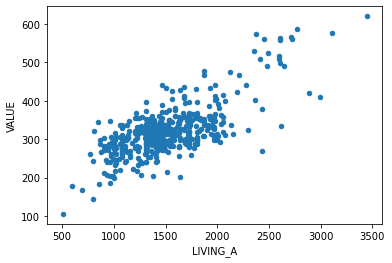

In [5]:
houses.plot.scatter(x='LIVING_A', y='VALUE')

<AxesSubplot:xlabel='ROOMS', ylabel='VALUE'>

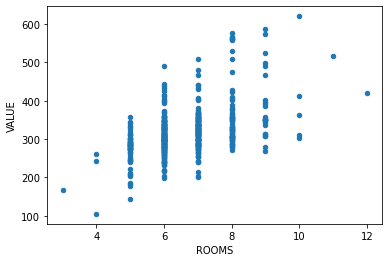

In [6]:
houses.plot.scatter(x='ROOMS', y='VALUE')

## Import the linear_model for the scikit learn library

In [7]:
from sklearn import linear_model
##import statsmodels.api as sm

We have to convert the values into 2D arrays in order for them to work with the function LinearRegression()
We use NumPy array funciton to do that.

In [8]:
X = np.array(houses['LIVING_A']).reshape(-1, 1)
Y = np.array(houses['VALUE']).reshape(-1, 1)

Run the regression on variables X=LIVING_A and Y=VALUE

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

Check the results of the regression: Coefficients, Intercept

In [10]:
regr.coef_

array([[0.11393523]])

In [11]:
regr.intercept_

array([148.99053828])

## Predict the values with a single number, or with an array.

In [12]:
regr.predict([[2000]])

array([[376.86099395]])

In [13]:
regr.predict(X)

array([[303.03096631],
       [374.12654848],
       [305.19573564],
       [446.13361248],
       [312.82939591],
       [269.76187978],
       [367.29043481],
       [285.71281168],
       [273.40780708],
       [489.88473997],
       [318.18435162],
       [315.33597092],
       [295.96698219],
       [419.92851008],
       [293.91614809],
       [247.43057513],
       [312.82939591],
       [313.6269425 ],
       [316.4753232 ],
       [334.93283011],
       [289.35873897],
       [297.33420492],
       [294.25795377],
       [383.01349626],
       [305.19573564],
       [324.56472437],
       [254.60849448],
       [290.72596171],
       [268.39465705],
       [241.05020237],
       [316.36138797],
       [312.60152545],
       [334.13528351],
       [333.56560737],
       [366.15108254],
       [307.70231065],
       [307.81624588],
       [314.4244891 ],
       [258.368357  ],
       [354.41575407],
       [353.16246656],
       [315.33597092],
       [362.04941433],
       [341

Calculate the R-Squared

In [14]:
regr.score(X, Y)

0.5151606206165072

Calculate the MAE - Mean Absolute Error

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, regr.predict(X))

34.928062867027926

A **mean absolute error** of 34.93 means that in average, our model makes an error of +/- 34.93 when predicting the VALUE given its LIVING AREA.

# Running a Multiple Linear Regression
The process will be the same as before with few exeptions.

In [16]:
X = houses[['LIVING_A', 'ROOMS']]

In [17]:
Y = houses[['VALUE']]

In [18]:
mregr = linear_model.LinearRegression()
mregr.fit(X, Y)

LinearRegression()

In [19]:
mregr.coef_

array([[0.10601732, 4.55086057]])

In [20]:
mregr.intercept_

array([130.62427748])

In [21]:
mregr.predict([[2100,5]])

array([[376.01496263]])

In [22]:
mregr.predict(X)

array([[301.26486418],
       [385.62311721],
       [312.3809145 ],
       [448.07520597],
       [314.9332147 ],
       [270.30780531],
       [365.609496  ],
       [285.1502308 ],
       [269.14949914],
       [484.23499816],
       [315.36516839],
       [312.71473527],
       [294.69179004],
       [423.69122124],
       [292.78347819],
       [254.07927021],
       [314.9332147 ],
       [315.67533597],
       [318.32576909],
       [335.50057573],
       [293.09364577],
       [295.96399794],
       [293.10153017],
       [375.68902626],
       [307.83005393],
       [325.85299916],
       [251.65664053],
       [294.36585367],
       [269.03559741],
       [243.59143944],
       [313.66889119],
       [314.72118005],
       [334.75845445],
       [334.22836783],
       [373.65104389],
       [305.6115745 ],
       [305.71759183],
       [311.86659667],
       [255.15521225],
       [353.62953828],
       [352.46334771],
       [317.26559584],
       [369.8344202 ],
       [341

In [23]:
mregr.score(X,Y)

0.5192610968324911

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, mregr.predict(X))

34.863161528384936